<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Course3/Practice/Week_2_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-12-23 18:23:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 142.250.73.240, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2020-12-23 18:23:10 (298 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [6]:
import json

with open("/tmp/sarcasm.json", "r") as f:
    data_store = json.load(f)

sentences = []
labels = []

for item in data_store:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])

In [7]:
len(sentences)

26709

In [8]:
training_size = 20000
vocab_size = 10000
embedding_dim = 32
max_length = 50
trunc_type="post"
padding_type="post"
oov_token="<OOV>"


In [14]:
training_sentences = sentences[:training_size]
training_labels = labels[:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

In [16]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [27]:
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAvgPool1D(),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            320000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                792       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 320,817
Trainable params: 320,817
Non-trainable params: 0
_________________________________________________________________


In [29]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 0.6693 - accuracy: 0.5737 - val_loss: 0.4365 - val_accuracy: 0.8225
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3831 - accuracy: 0.8413 - val_loss: 0.3498 - val_accuracy: 0.8520
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2720 - accuracy: 0.8951 - val_loss: 0.3432 - val_accuracy: 0.8544
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2176 - accuracy: 0.9203 - val_loss: 0.3538 - val_accuracy: 0.8538
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1803 - accuracy: 0.9376 - val_loss: 0.3707 - val_accuracy: 0.8514
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1535 - accuracy: 0.9483 - val_loss: 0.3981 - val_accuracy: 0.8505
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1316 - accuracy: 0.9548 - val_loss: 0.4276 - val_accuracy: 0.8413
Epoch 

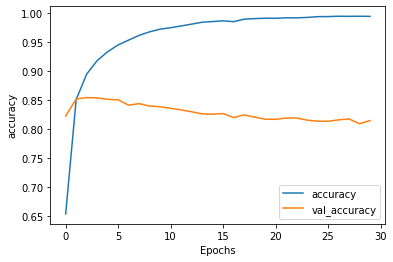

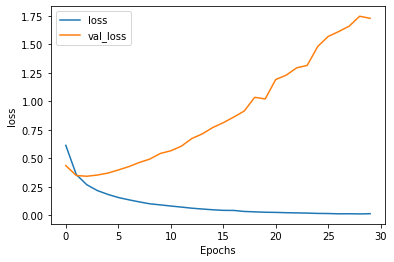

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))